# Logistic Regression or Logistic classifier

## Regression and classification

Regression and Classification algorithms are <b>Supervised Learning</b> algorithms. Both the algorithms are used for prediction in Machine learning and work with the labeled datasets. But the difference between both is how they are used for different machine learning problems.

The main difference between Regression and Classification algorithms that Regression algorithms are used to predict the <b>continuous values</b> such as price, salary, age, etc. and Classification algorithms are used to predict/Classify the <b>discrete values</b> such as Male or Female, True or False, Spam or Not Spam, etc.

### Types of ML Classification Algorithms

- Logistic Regression
- K-Nearest Neighbours
- Support Vector Machines
- Kernel SVM
- Naïve Bayes
- Decision Tree Classification
- Random Forest Classification

### Types of ML Regression Algorithms

- Simple Linear Regression
- Multiple Linear Regression
- Polynomial Regression
- Support Vector Regression
- Decision Tree Regression
- Random Forest Regression

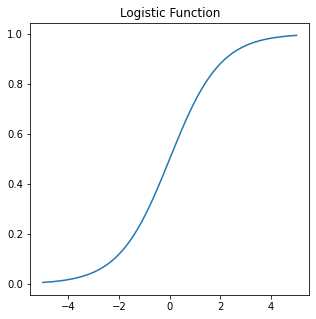

In [87]:
import numpy as np
def logistic_function(x):
    return 1/(1+np.exp(-x))

x  = np.linspace(-5,5,200)
y = logistic_function(x)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(x, y)
plt.title(f"Logistic Function")
plt.draw()


## Titanic data set

In the titanic problem.
<b>Goal: Predict survival on the Titanic</b>
So the prediction is yes or no which are discrete set of values. So we need to apply <b>classification</b> algorithims.

In [74]:
import os
import pandas as pd
nb_full_path = os.path.join(os.getcwd(), 'Day-10.ipynb')
df=pd.read_csv(os.path.join(os.path.dirname(nb_full_path) + '/data/train.csv'), sep=',',header=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df = df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [76]:
# Label categorical data with some number (see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
print(df.Sex.unique())
df['Sex'] = df['Sex'].replace({'male':0, 'female':1})
print(df.Embarked.unique())
df['Embarked'] = df['Embarked'].replace({'Q':0, 'S':1, 'C':2})
df.head()

['male' 'female']
['S' 'C' 'Q' nan]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,1.0
1,1,1,1,38.0,1,0,71.2833,C85,2.0
2,1,3,1,26.0,0,0,7.9250,NaN,1.0
3,1,1,1,35.0,1,0,53.1000,C123,1.0
4,0,3,0,35.0,0,0,8.0500,NaN,1.0


In [78]:
for (columnName, columnData) in df.iteritems():
    nan_percentage = df[columnName].isna().sum()/df.shape[0] * 100
    print(f"Percentage of {columnName} data missing: {nan_percentage}")

Percentage of Survived data missing: 0.0
Percentage of Pclass data missing: 0.0
Percentage of Sex data missing: 0.0
Percentage of Age data missing: 19.865319865319865
Percentage of SibSp data missing: 0.0
Percentage of Parch data missing: 0.0
Percentage of Fare data missing: 0.0
Percentage of Cabin data missing: 77.10437710437711
Percentage of Embarked data missing: 0.22446689113355783


In [69]:
df = df.drop(['Cabin'], axis=1)
df['Age'].fillna(value=df["Age"].mean(), inplace=True)
df['Embarked'].fillna(value=df["Embarked"].median(), inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0


In [70]:
Y = df['Survived'].values
X = df.iloc[:, 2:].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 20, random_state = 0)

In [72]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8